# Cadre décisionnel et notations

On se place dans le cadre de la classification multi-classe, avec les notations habituelles (pour le détails des notations, on pourra consulter l’énoncé du TP sur les $k$-plus proches voisins) : on suppose que les données peuvent être reparties dans $K$ classes. L’ensemble d’apprentissage est de taille $n : \mathcal{D}_n = \{(x_i , y_i ), i = 1, ..., n\}$ contenant les $n$ observations (les $x_i$ ) et leurs étiquettes (les $y_i$). Pour mémoire $x_i = (x_1 , ..., x_p )^T \in \mathcal{X} \subset \mathbb{R}^p$ est une observation, et dans le cas bidimensionnel $p = 2$.

# Génération artificielle de données

On peut utiliser de nouveau les fonctions qui génèrent les données des TP précédents (knn, perceptron notamment). Afin d’afficher quelques jeux de données, vous pouvez aussi utiliser ou modifier les fonctions `plot_2d` ou `plot_2d_simple` du fichier `tp_tree_source.py`.

# Arbres de décision - Algorithme CART

On pourra consulter [2, Chapitre 9.2] pour plus de détails sur les arbres. La source la plus détaillée
sur le sujet étant le livre fondateur [1]. Rappelons ici le fonctionnement d’un arbre de décision (voir aussi les figures en dernière page). Notons qu’on ne considère que des arbres binaires par simplicité : un nœud ne peut avoir que deux enfants, sauf si c’est une feuille, auquel cas il n’en a aucun.

On associe à toute partition des données une représentation par arbre. Au départ l’arbre est restreint à
un seul nœud, sa racine, qui représente l’espace $\mathcal{X}$ tout entier. Récursivement, à chaque étape on choisit :
- une variable $j \in \{1, ..., p\}$ (parmi les $p$ possibles),
- un seuil $\tau \in \mathbb{R}$

et l’on partitionne l’espace des variables explicatives $\mathcal{X}$ en deux sous-ensembles qui sont représentés par deux nœuds dans l’arbre $G(j, \tau) = \{x = (x_1 , ..., x_p )^T \in \mathbb{R}^p : x_j < \tau \}$ et $D(j, \tau) = \{x = (x_1 , ..., x_p)^T \in \mathbb{R}^p : x_j \geq \tau \}$. On incrémente donc à chaque étape le nombre de composantes de la partition, et de manière équivalente le nombre de feuilles de l’arbre. On répète le processus jusqu’à atteindre un critère d’arrêt,
qui peut être :

- le fait que la profondeur de l’arbre dépasse un seuil prescrit,
- le fait que l’effectif d’un nœud (i.e., le nombre d’observations qui tombent dans la partition correspondante) est inférieur à un seuil prescrit,
- le fait que le nombre de feuilles de l’arbre dépasse un seuil prescrit.
- etc.

Un exemple visuel d’une telle construction est donné à la Figure 1. Il faut maintenant définir une règle pour décider où l’on doit faire la nouvelle découpe (splitting). Ce choix est crucial et n’est pas unique. Pour cela on utilise une fonction qui mesure “l’impureté”, que l’on note $H$ associée à une partition. On cherche alors la découpe (variable/seuil) qui produit une partition la plus pure possible selon le critère $H$. Mathématiquement il s’agit de résoudre :

$$
\operatorname*{argmax}_{j\in [1,p], \tau\in\mathbb{R}} \hat{q}_{j,\tau}H(G(j,\tau)) + (1-\hat{q}_{j,\tau})H(D(j,\tau))
$$

où l’on a noté

$$
\hat{q}_{j,\tau} = \frac
    {|\{ i \in [1,n] : x_i \in G(j,\tau) \}|}
    {|\{ i' \in [1,n] : x_{i'} \in G(j,\tau) \cup D(j,\tau) \}|}
$$

la proportion des observations qui tombent dans $G(j, \tau)$. Noter qu’ici $| · |$ représente le cardinal d’un
ensemble. Pour tout ensemble $R \subset \mathbb{R}^p$ et toute étiquette $k$ on note $\hat{p}_k(R)$ la proportion d’observations qui ont $k$ comme étiquette (numérotées de 1 à $K$), i.e.,

$$
\hat{p}_{k}(R) = \frac
    {|\{ i \in [1,n] : x_i \in R \mbox{ et } y_i=k \}|}
    {|\{ i \in [1,n] : x_{i} \in R \}|}
$$

On considérera dans CART les mesures d’impureté $H$ suivantes :
- l’indice de Gini : $\sum_{k=1}^K \hat{p}_k(R)(1-\hat{p}_k(R)$
- l’entropie : $-\sum_{k=1}^K \hat{p}_k(R)\log (\hat{p}_k(R))$

# Question 1

Dans le cadre de la régression (i.e., quand on cherche à prédire une valeur numérique pour Y et non une classe), proposez une autre mesure d’homogénéité. Justifier votre choix.

On cherche toujours à minimiser:

$$
\operatorname*{argmax}_{j\in [1,p], \tau\in\mathbb{R}} \hat{q}_{j,\tau}H(G(j,\tau)) + (1-\hat{q}_{j,\tau})H(D(j,\tau))
$$

Mais avec la variance comme mesure d’impureté:

$$
H(\mathcal{D}_n) = \overline{\operatorname*{var}}(\mathcal{D}_n) := \frac{1}{|\mathcal{D}_n|}\sum_{(x_i, y_i)\in\mathcal{D}_n} (y_i - y_n)^2
$$

Où:

$$
y_n = := \frac{1}{|\mathcal{D}_n|}\sum_{(x_i, y_i)\in\mathcal{D}_n} y_i
$$


Avec `scikit-learn` on peut construire des arbres de décision grâce au package `tree`. On obtient un classifieur avec `tree.DecisionTreeClassifier`.

    from sklearn import tree
    
## Question 2

Simulez avec `rand_checkers` des échantillons de taille $n = 456$ (attention à bien équilibrer les classes). Créez deux courbes qui donnent le pourcentage d’erreurs commises en fonction de la profondeur maximale de l’arbre (une courbe pour Gini, une courbe pour l’entropie). On laissera les autres paramètres à leur valeurs par défaut.

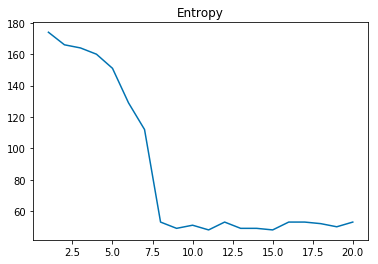

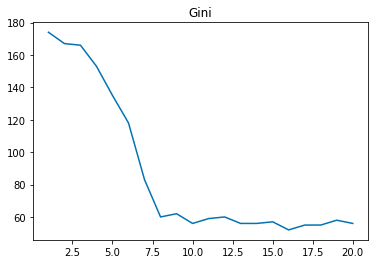

In [9]:
import tptreesource as tp
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from typing import List


def split_data(X, y):
    return [
        X[::2],
        y[::2],
        X[1::2],
        y[1::2],
    ]

def calc_error(y_pred, y):
    return np.count_nonzero(y_pred-y)

def get_tree_model(X_train, y_train, X_test, y_test, h: int, criterion: str, errors: List[float]):
    model = tree.DecisionTreeClassifier(max_depth=h, criterion=criterion).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    err = calc_error(y_pred, y_test)
    errors.append(err)

def q2(X, y):
    X_train, y_train, X_test, y_test = split_data(X, y)
    errors_entropy = []
    errors_gini = []
    max_d_range = range(1, 21)
    for d in max_d_range:
        get_tree_model(X_train, y_train, X_test, y_test, d, "entropy", errors_entropy)
        get_tree_model(X_train, y_train, X_test, y_test, d, "gini", errors_gini)
        
    plt.figure()
    plt.title("Entropy")
    plt.plot(max_d_range, errors_entropy)
    plt.figure()
    plt.title("Gini")
    plt.plot(max_d_range, errors_gini)
    return [errors_entropy, errors_gini]
    
n = int(456 / 4)
data = tp.rand_checkers(n, n, n, n)
X = data[:,0:2]
y = data[:,2]
q2_errors_entropy, q2_errors_gini = q2(X, y)

## Question 3

Afficher la règle de classification obtenues en utilisant la profondeur qui minimise le pourcentage d’erreurs obtenues avec l’entropie et avec l’indice de Gini (utiliser si besoin les fonctions `plot_2d` et `frontiere` du fichier source).

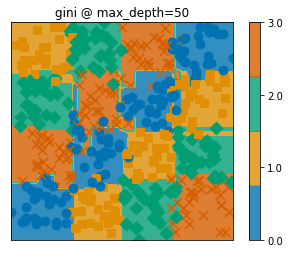

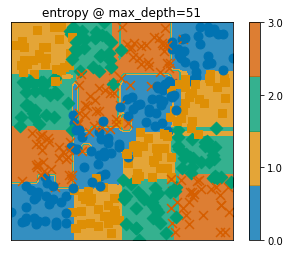

In [8]:
def graph_model(X, y, criterion: str, d: int):
    plt.figure()
    plt.title(criterion + " @ max_depth=" + str(d))
    model_gini = tree.DecisionTreeClassifier(max_depth=d, criterion=criterion).fit(X, y)
    tp.frontiere_new(lambda vec: model_gini.predict(vec.reshape(1,-1)), X, y)

def q3(X, y, errors_entropy, errors_gini):
    # X_train, y_train, X_test, y_test = split_data(X, y)
    best_d_gini = np.min(errors_gini)
    best_d_entropy = np.min(errors_entropy)
    graph_model(X, y, "gini", best_d_gini)
    graph_model(X, y, "entropy", best_d_entropy)

q3(X, y, q2_errors_entropy, q2_errors_gini)